Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found classes: ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


C:\Users\niles\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- Training the model ---
Epoch 1/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.5733 - loss: 0.9480 - val_accuracy: 0.3568 - val_loss: 1.9058
Epoch 2/5
 1/89 ━━━━━━━━━━━━━━━━━━━━ 1:59 1s/step - accuracy: 0.6875 - loss: 0.5993

C:\Users\niles\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - accuracy: 0.6875 - loss: 0.5993 - val_accuracy: 0.3776 - val_loss: 1.8543
Epoch 3/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.7488 - loss: 0.5872 - val_accuracy: 0.4948 - val_loss: 1.8270
Epoch 4/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.8125 - loss: 0.4688 - val_accuracy: 0.4740 - val_loss: 1.9099
Epoch 5/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.8710 - loss: 0.3479 - val_accuracy: 0.5208 - val_loss: 2.5581

--- Plotting training history ---


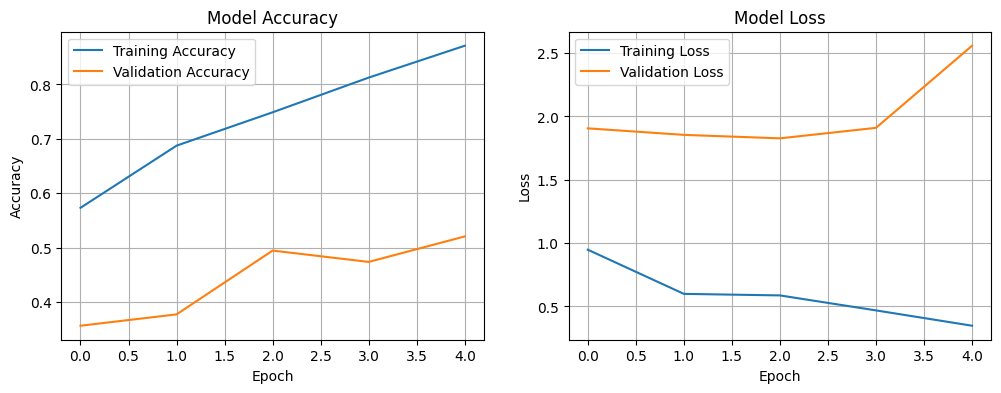

Saved training graphs to 'brain_tumor_accuracy.png' and 'brain_tumor_loss.png'

--- Displaying individual predictions ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step
Saved 5 sample predictions to 'brain_tumor_predictions.png'


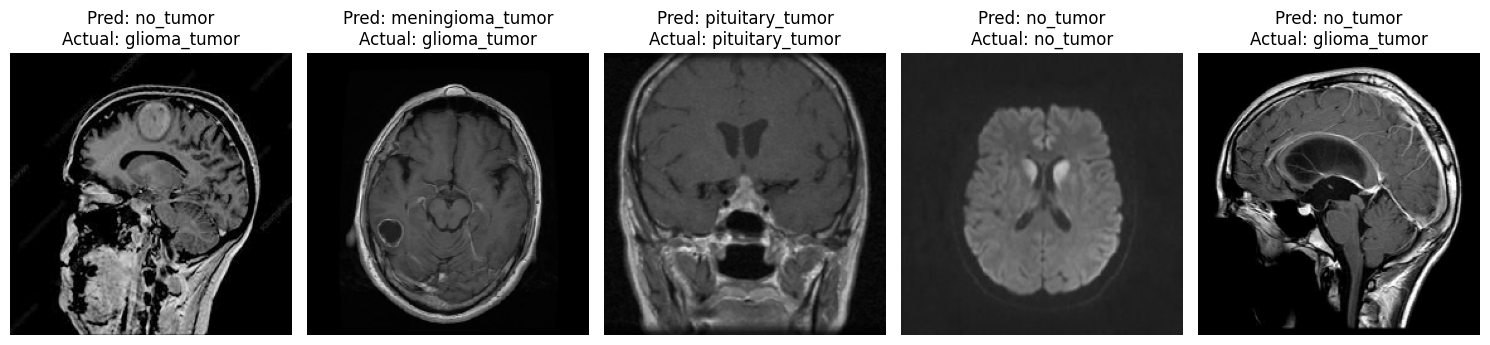

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt
import os

# --- 1. Set Up File Paths (from your notebook) ---
# These paths must be correct on your computer
train_dataset_path = r'C:\Users\niles\Downloads\brain tumour\Training'
test_dataset_path = r'C:\Users\niles\Downloads\brain tumour\Testing'

# --- 2. Create Image Generators ---
INPUT_SHAPE = (224, 224, 3)
BATCH_SIZE = 32

# Note: Using only rescale for a minimal example
# Your original augmentation is good for improving accuracy
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dataset_path,
    target_size=(INPUT_SHAPE[0], INPUT_SHAPE[1]),
    batch_size=BATCH_SIZE,
    class_mode='categorical' # For 4 classes
)

test_generator = test_datagen.flow_from_directory(
    test_dataset_path,
    target_size=(INPUT_SHAPE[0], INPUT_SHAPE[1]),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Get class names from the generator
class_names = list(train_generator.class_indices.keys())
print(f"Found classes: {class_names}")

# --- 3. Define the CNN Model (from your notebook) ---
model = Sequential([
    Conv2D(64, kernel_size=3, input_shape=INPUT_SHAPE, activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(32, kernel_size=3, activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(16, kernel_size=3, activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(384, activation='relu'),
    Dense(256, activation='relu'),
    Dense(4, activation='softmax') # 4 classes, so softmax
])

# 4. Compile the Model
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

# 5. Train the Model (Corrected steps)
print("\n--- Training the model ---")
history = model.fit(
    train_generator,
    epochs=5, # Using 5 for a minimal run
    validation_data=test_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE, # Corrected
    validation_steps=test_generator.samples // BATCH_SIZE  # Corrected
)

# 6. Plot Training & Validation Graphs
print("\n--- Plotting training history ---")
plt.figure(figsize=(12, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig('brain_tumor_accuracy.png')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig('brain_tumor_loss.png')

plt.show()
print("Saved training graphs to 'brain_tumor_accuracy.png' and 'brain_tumor_loss.png'")

# 7. Test and Display 5 Sample Predictions
print("\n--- Displaying individual predictions ---")

# Get one batch of test images and labels
x_test_batch, y_test_batch = next(test_generator)

# Make predictions on the first 5 images
predictions = model.predict(x_test_batch[:5])
predicted_indices = np.argmax(predictions, axis=1)
actual_indices = np.argmax(y_test_batch[:5], axis=1)

# Set up a 1x5 grid
plt.figure(figsize=(15, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    
    # Display the image
    plt.imshow(x_test_batch[i])
    
    # Get the string name for the labels
    pred_name = class_names[predicted_indices[i]]
    actual_name = class_names[actual_indices[i]]
    
    plt.title(f"Pred: {pred_name}\nActual: {actual_name}")
    plt.axis('off')

plt.tight_layout()
plt.savefig('brain_tumor_predictions.png')
print("Saved 5 sample predictions to 'brain_tumor_predictions.png'")
plt.show()